# 🔍 Incident Classification with Random Forest
This notebook trains a Random Forest model on the reshaped multi-sensor dataset to classify incidents like Power Outage, Overheating, and Vibration Increase.

## 📥 Step 1: Load the Dataset

In [2]:
import pandas as pd

# Load the reshaped and labeled dataset
file_path = "../test_csv\motor_monitor_0_reshaped.csv"  # Adjust path if needed
df = pd.read_csv(file_path)
df.head()

,timestamp,power,rpm,temperature,vibration,is_anomaly,state,label
0,2025-04-07 00:00:00,5.022329,2.653643,22.0,7.523581,False,off,Normal
1,2025-04-07 00:01:00,5.077981,2.226890,22.0,7.324660,False,off,Normal
2,2025-04-07 00:02:00,4.833379,2.293508,22.0,7.432946,False,off,Power_outage
3,2025-04-07 00:03:00,6.071584,2.802438,22.0,7.827574,False,off,Normal
4,2025-04-07 00:04:00,4.644964,2.028206,22.0,7.241896,False,off,Power_outage


## 🧹 Step 2: Preprocessing the Data

In [3]:
# Drop timestamp and is_anomaly
df = df.drop(columns=["timestamp", "is_anomaly"])

# One-hot encode the 'state' column
df = pd.get_dummies(df, columns=["state"])
df.head()

,power,rpm,temperature,vibration,label,state_idle,state_off,state_run
0,5.022329,2.653643,22.0,7.523581,Normal,0,1,0
1,5.077981,2.226890,22.0,7.324660,Normal,0,1,0
2,4.833379,2.293508,22.0,7.432946,Power_outage,0,1,0
3,6.071584,2.802438,22.0,7.827574,Normal,0,1,0
4,4.644964,2.028206,22.0,7.241896,Power_outage,0,1,0


## 📊 Step 3: Prepare Features and Labels

In [4]:
X = df.drop("label", axis=1)
y = df["label"]

## 🔀 Step 4: Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🧠 Step 5: Train the Random Forest Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 📈 Step 6: Evaluate the Model

Classification Report:

                    precision    recall  f1-score   support

            Normal       1.00      1.00      1.00       279
      Power_outage       1.00      1.00      1.00         8
Vibration_increase       0.00      0.00      0.00         1

          accuracy                           1.00       288
         macro avg       0.67      0.67      0.67       288
      weighted avg       0.99      1.00      0.99       288



c:\Users\Thomas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thomas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Thomas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


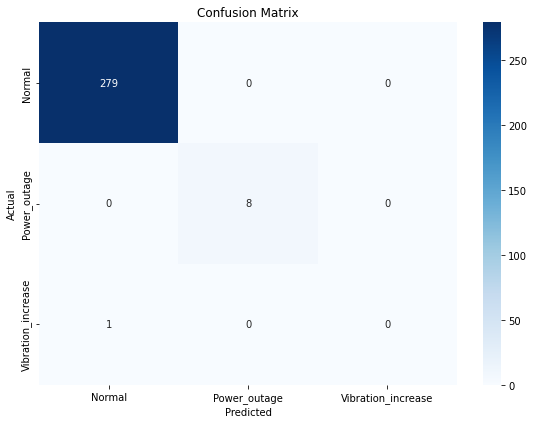

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [8]:
# 💾 Save the trained model
import joblib
joblib.dump(clf, "../test_cases/saved_models/random_forest.pkl")
print("✅ Model saved to: ../test_cases/saved_models/random_forest.pkl")

✅ Model saved to: ../test_cases/saved_models/random_forest.pkl
